## Регрессия RUL различными методами

TO DO:
- переименовать параметры 
- Random Forest 
- Gradient Boosting (sklearn, catboost, xgboost)

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import itertools
from time import time

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


import warnings
warnings.filterwarnings("ignore")

C:\Users\I519322\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Чтение данных

In [2]:
df = pd.read_parquet('data/train_data.parquet')

In [3]:
test = pd.read_parquet('data/test_data.parquet')

In [4]:
df_feat = pd.read_parquet('data/train_data_feat.parquet')

In [5]:
test_feat = pd.read_parquet('data/test_data_feat.parquet')

Отшкалируем данные

In [6]:
feat_imp = pd.read_parquet('data/feature_imp_reg.parquet')

In [7]:
# params = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
#        's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
#        's15', 's16', 's17', 's18', 's19', 's20', 's21']

params = ['setting1', 'setting2', 's2', 's3', 's4', 's7', 
          's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 
          's20', 's21']

# параметры отобранные случайным лесом
params_imp = feat_imp.feature[:100]

In [8]:
scaler = StandardScaler()
df[params] = scaler.fit_transform(df[params])

In [9]:
test[params] = scaler.fit_transform(test[params])

In [10]:
df_feat[params_imp] = scaler.fit_transform(df_feat[params_imp])
test_feat[params_imp] = scaler.fit_transform(test_feat[params_imp])

In [11]:
xtrain = df[params]
ytrain = df['RUL']
xtest = test[params]
ytest = test['RUL']

In [12]:
xtrain_feat = df_feat[params_imp]
xtest_feat = test_feat[params_imp]

#### Случайный лес

In [73]:
model = RandomForestRegressor(criterion='mse', 
                              n_estimators=95,
                              max_depth=4,
                              n_jobs=4
                             )

model.fit(xtrain, ytrain)

y_pred_for = model.predict(xtest)

In [74]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_for)),
                         mean_absolute_error(ytest, y_pred_for),
                         r2_score(ytest, y_pred_for)]
              })

,Metrics,Linear
0,RMSE,66.623821
1,MAE,51.793176
2,R2,-0.276089


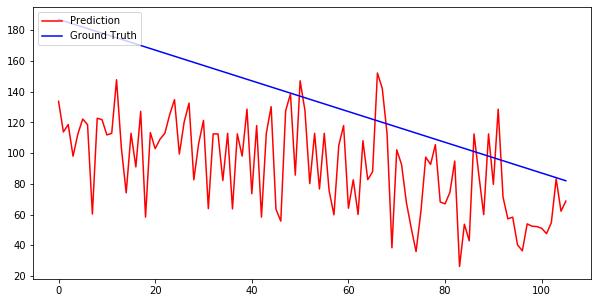

In [17]:
xtest_1 = xtest[test.id==4].reset_index(drop=True)
ytest_1 = ytest[test.id==4].reset_index(drop=True)

pred = model.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

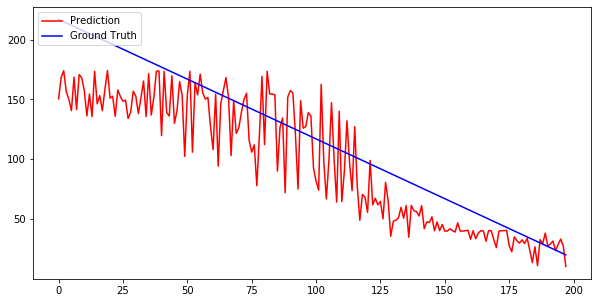

In [18]:
xtest_1 = xtest[test.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred = model.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

In [71]:
model_rf_feat = RandomForestRegressor(criterion='mse', 
                              n_estimators=100,
                              max_depth=6,
                              n_jobs=4
                             )

model_rf_feat.fit(xtrain_feat, ytrain)

y_pred_rf_feat = model_rf_feat.predict(xtest_feat)

In [72]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error( ytest,y_pred_rf_feat)),
                         mean_absolute_error(ytest, y_pred_rf_feat),
                         r2_score(ytest, y_pred_rf_feat)]
              })

,Metrics,Linear
0,RMSE,63.738283
1,MAE,50.737976
2,R2,-0.167946


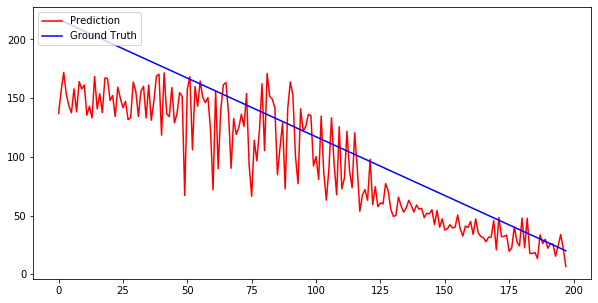

In [75]:
xtest_1 = xtest_feat[test_feat.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred = model_rf_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

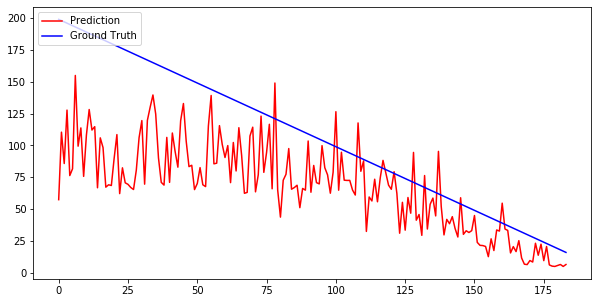

In [76]:
xtest_1 = xtest_feat[test_feat.id==20].reset_index(drop=True)
ytest_1 = ytest[test.id==20].reset_index(drop=True)

pred = model_rf_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

#### Градиентный бустинг

In [36]:
model = GradientBoostingRegressor(learning_rate=0.05,
                                 max_depth=4,
                                 n_estimators=100
                                 )

model.fit(xtrain, ytrain)

y_pred_gb = model.predict(xtest)

In [77]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_gb)),
                         mean_absolute_error(ytest, y_pred_gb),
                         r2_score(ytest, y_pred_gb)]
              })

,Metrics,Linear
0,RMSE,63.668795
1,MAE,49.365301
2,R2,-0.165401


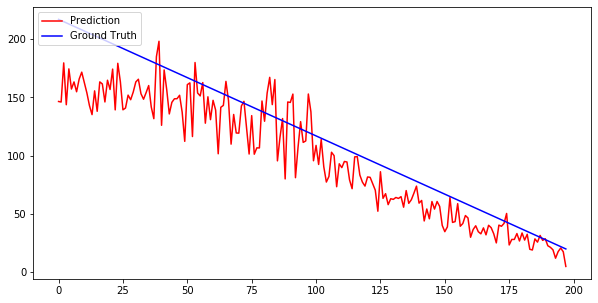

In [38]:
xtest_1 = xtest[test.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred = model.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

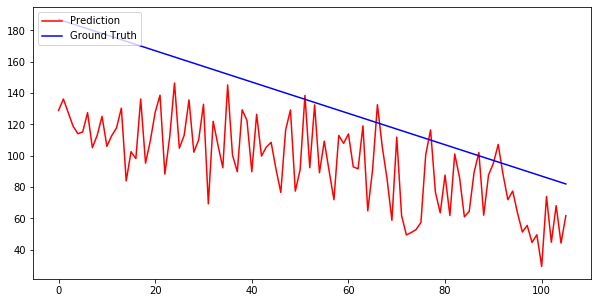

In [39]:
xtest_1 = xtest[test.id==4].reset_index(drop=True)
ytest_1 = ytest[test.id==4].reset_index(drop=True)

pred = model.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

In [78]:
model_gb_feat = GradientBoostingRegressor(learning_rate=0.05,
                                 max_depth=4,
                                 n_estimators=100
                                 )

model_gb_feat.fit(xtrain_feat, ytrain)

y_pred_gb_feat = model_gb_feat.predict(xtest_feat)

In [79]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_gb_feat)),
                         mean_absolute_error(ytest, y_pred_gb_feat),
                         r2_score(ytest, y_pred_gb_feat)]
              })

,Metrics,Linear
0,RMSE,55.710423
1,MAE,43.864357
2,R2,0.107733


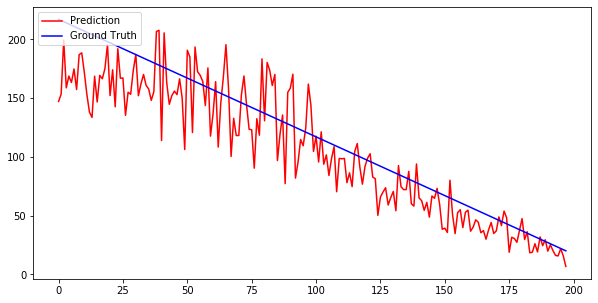

,Metrics,Linear
0,RMSE,26.280463
1,MAE,20.895461
2,R2,0.788589


In [83]:
xtest_1 = xtest_feat[test_feat.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred_feat = model_gb_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred_feat, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred_feat)),
                         mean_absolute_error(ytest_1, pred_feat),
                         r2_score(ytest_1, pred_feat)]
              })

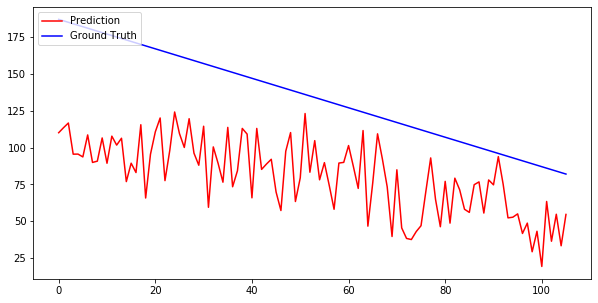

,Metrics,Linear
0,RMSE,58.497592
1,MAE,54.076619
2,R2,-2.654973


In [84]:
xtest_1 = xtest_feat[test_feat.id==4].reset_index(drop=True)
ytest_1 = ytest[test.id==4].reset_index(drop=True)

pred_feat = model_gb_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred_feat, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred_feat)),
                         mean_absolute_error(ytest_1, pred_feat),
                         r2_score(ytest_1, pred_feat)]
              })

In [92]:
model_xg = XGBRegressor(               
                 learning_rate=0.05,
                 max_depth=4,
                 n_estimators=100)

model_xg.fit(xtrain, ytrain)

y_pred_xg = model_xg.predict(xtest)

[01:18:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_xg)),
                         mean_absolute_error(ytest, y_pred_xg),
                         r2_score(ytest, y_pred_xg)]
              })

,Metrics,Linear
0,RMSE,64.314331
1,MAE,50.012264
2,R2,-0.189152


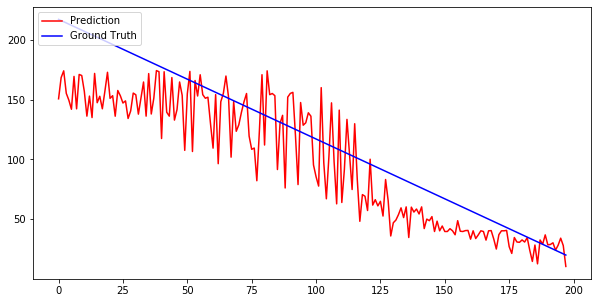

,Metrics,Linear
0,RMSE,31.159885
1,MAE,25.670444
2,R2,0.702797


In [94]:
xtest_1 = xtest[test.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred = model.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred)),
                         mean_absolute_error(ytest_1, pred),
                         r2_score(ytest_1, pred)]
              })

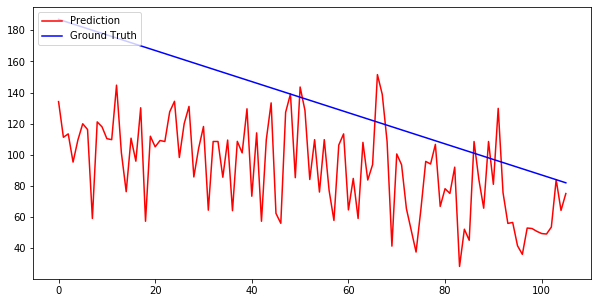

,Metrics,Linear
0,RMSE,51.878413
1,MAE,45.130126
2,R2,-1.874627


In [95]:
xtest_1 = xtest[test.id==4].reset_index(drop=True)
ytest_1 = ytest[test.id==4].reset_index(drop=True)

pred = model.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred)),
                         mean_absolute_error(ytest_1, pred),
                         r2_score(ytest_1, pred)]
              })

In [86]:
model_xg_feat = XGBRegressor(               
                 learning_rate=0.05,
                 max_depth=4,
                 n_estimators=100)

model_xg_feat.fit(xtrain_feat, ytrain)

y_pred_xg_feat = model_xg_feat.predict(xtest_feat)

[01:16:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_xg_feat)),
                         mean_absolute_error(ytest, y_pred_xg_feat),
                         r2_score(ytest, y_pred_xg_feat)]
              })

,Metrics,Linear
0,RMSE,56.577246
1,MAE,44.737299
2,R2,0.079751


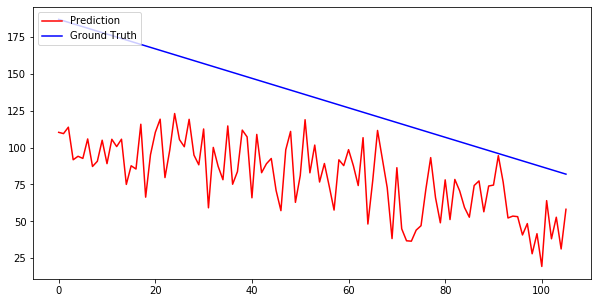

,Metrics,Linear
0,RMSE,58.885956
1,MAE,54.473058
2,R2,-2.703664


In [90]:
xtest_1 = xtest_feat[test_feat.id==4].reset_index(drop=True)
ytest_1 = ytest[test_feat.id==4].reset_index(drop=True)

pred_feat = model_xg_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred_feat, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred_feat)),
                         mean_absolute_error(ytest_1, pred_feat),
                         r2_score(ytest_1, pred_feat)]
              })

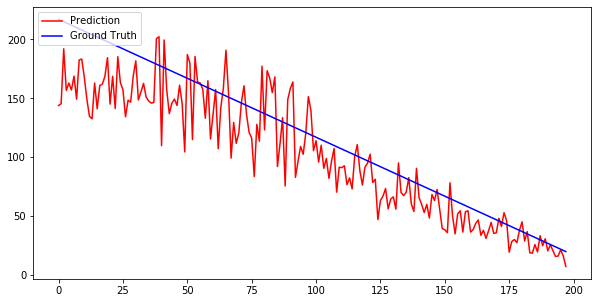

,Metrics,Linear
0,RMSE,27.913058
1,MAE,22.278843
2,R2,0.761506


In [91]:
xtest_1 = xtest_feat[test_feat.id==100].reset_index(drop=True)
ytest_1 = ytest[test_feat.id==100].reset_index(drop=True)

pred_feat = model_xg_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred_feat, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred_feat)),
                         mean_absolute_error(ytest_1, pred_feat),
                         r2_score(ytest_1, pred_feat)]
              })

In [39]:
model_cat = CatBoostRegressor(learning_rate=0.1,
                                max_depth=6,
                                n_estimators=150,
                               custom_metric=['MAE', 'RMSE', 'R2'],
                                verbose=0)
model_cat.fit(xtrain, ytrain, plot=True)
y_pred_cat = model_cat.predict(xtest)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [40]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_cat)),
                         mean_absolute_error(ytest, y_pred_cat),
                         r2_score(ytest, y_pred_cat)]
              })

,Metrics,Linear
0,RMSE,63.973068
1,MAE,49.737587
2,R2,-0.176566


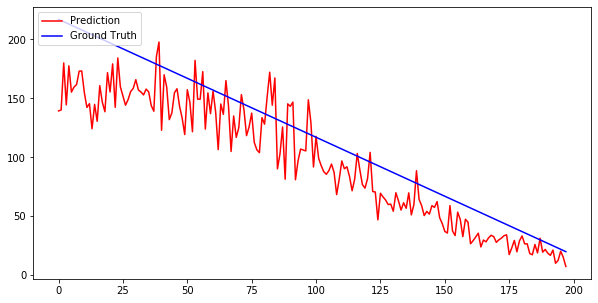

,Metrics,Linear
0,RMSE,28.841492
1,MAE,24.129696
2,R2,0.745377


In [41]:
xtest_1 = xtest[test.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred = model_cat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred)),
                         mean_absolute_error(ytest_1, pred),
                         r2_score(ytest_1, pred)]
              })

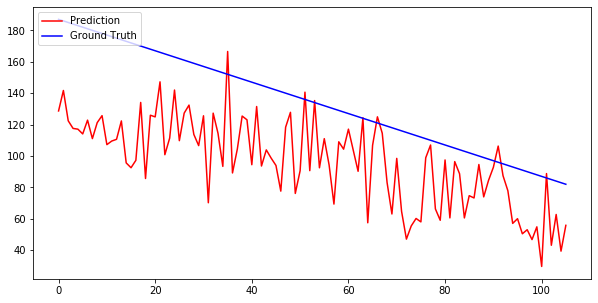

,Metrics,Linear
0,RMSE,44.326111
1,MAE,38.763788
2,R2,-1.098589


In [42]:
xtest_1 = xtest[test.id==4].reset_index(drop=True)
ytest_1 = ytest[test.id==4].reset_index(drop=True)

pred = model_cat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred)),
                         mean_absolute_error(ytest_1, pred),
                         r2_score(ytest_1, pred)]
              })

In [53]:
model_cat_feat = CatBoostRegressor(learning_rate=0.05,
                                max_depth=4,
                                n_estimators=200,
                               custom_metric=['MAE', 'RMSE', 'R2'],
                                verbose=0)
model_cat_feat.fit(xtrain_feat, ytrain, plot=True)
y_pred_cat_feat = model_cat_feat.predict(xtest_feat)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [54]:
pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest, y_pred_cat_feat)),
                         mean_absolute_error(ytest, y_pred_cat_feat),
                         r2_score(ytest, y_pred_cat_feat)]
              })

,Metrics,Linear
0,RMSE,55.223261
1,MAE,43.354368
2,R2,0.123270


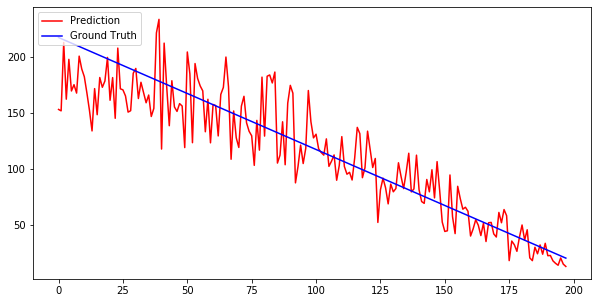

,Metrics,Linear
0,RMSE,24.578180
1,MAE,18.816252
2,R2,0.815090


In [55]:
xtest_1 = xtest_feat[test.id==100].reset_index(drop=True)
ytest_1 = ytest[test.id==100].reset_index(drop=True)

pred_feat = model_cat_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred_feat, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred_feat)),
                         mean_absolute_error(ytest_1, pred_feat),
                         r2_score(ytest_1, pred_feat)]
              })

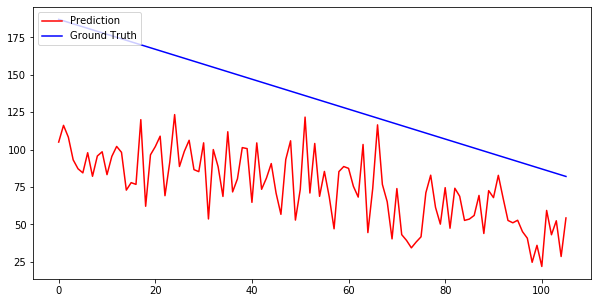

,Metrics,Linear
0,RMSE,63.263004
1,MAE,59.209905
2,R2,-3.274721


In [56]:
xtest_1 = xtest_feat[test.id==4].reset_index(drop=True)
ytest_1 = ytest[test.id==4].reset_index(drop=True)

pred_feat = model_cat_feat.predict(xtest_1)

plt.figure(figsize=(10,5))
plt.plot(pred_feat, color='red', label='Prediction')
plt.plot(ytest_1, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

pd.DataFrame({'Metrics': ['RMSE', 'MAE', 'R2'],    
              'Linear': [np.sqrt(mean_squared_error(ytest_1, pred_feat)),
                         mean_absolute_error(ytest_1, pred_feat),
                         r2_score(ytest_1, pred_feat)]
              })